# IMPORTING

In [494]:
import psycopg2
import pandas as pd
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)
df_sample = pd.read_sql("SELECT * FROM pums_2017;", conn)
df_sample['puma'].unique()

array(['11606', '10100', '11505', '10400', '11615', '10300', '11801',
       '11507', '11102', '11402', '11604', '11506', '11607', '10703',
       '10702', '11706', '11101', '11000', '11300', '11603', '10800',
       '10701', '11703', '11104', '11103', '11601', '11802', '11611',
       '10502', '10200', '11705', '11602', '11616', '10901', '11702',
       '11503', '11610', '11401', '11504', '11501', '10501', '11608',
       '11200', '11900', '10902', '11704', '11605', '11612', '11613',
       '11502', '10504', '10503', '10600', '11609', '11701', '11614'],
      dtype=object)

## COLUMNS OF NOTE

- puma - Area code (PUMA) based on 2010 Census definition (areas with population of 100,000 or more, use with ST for unique code)00100..70301.Public use microdata area codes
- st - State Code based on 2010 Census definitions
- Count 359075

#### <span style="color:red">agep - age </span>


- sporder - person number
- adjinc - adjustment factor for income and earnings dollars amounts (6 implied decimal places)1011189.2017 factor (1.011189)
* cit - citizenship status

#### <span style="color:red"> nwab - Temporary absence from work (UNEDITED -See "Employment Status Recode" (ESR)) </span>
#### <span style="color:red">nwav - Available for work (UNEDITED -See "Employment Status Recode" (ESR)) </span>
#### <span style="color:red">nwla - On layoff from work (UNEDITED -See "Employment Status Recode" (ESR)) </span>
#### <span style="color:red">nwlk - Looking for work (UNEDITED -See "Employment Status Recode" (ESR)) </span>

- oip - All other income past 12 months (use ADJINC to adjust to constant dollars)

#### <span style="color:red">sch - School enrollment </span>
#### <span style="color:red">schl - Educational attainment </span>
 
- sex - 1.Male 2.Female
- wagp - Wages or salary income past 12 months (use ADJINC to adjust WAGP to constant dollars)

#### <span style="color:red">wkl - When last worked </span>
#### <span style="color:red">wrk - Worked last week </span>
#### <span style="color:red">esr - Employment status recode 1.Civilian employed, at work 2.Civilian employed, with a job but not at work 3.Unemployed 4.Armed forces, at work 5.Armed forces, with a job but not at work 6.Not in labor force </span>

- pernp - Total person's earnings (use ADJINC to adjustto constant dollars)
- pincp - Total person's income (signed, use ADJINC to adjust to constant dollars)
- povpip - Income-to-poverty ratio recode
- rac1p - Recoded detailed race code
- rac2p - Recoded detailed race code
- rac3p - Recoded detailed race code

- puma - Area code (PUMA) based on 2010 Census definition (areas with population of 100,000 or more, use with ST for unique code)00100..70301.Public use microdata area codes
- st - State Code based on 2010 Census definitions
- Count 359075
- agep - age
- sporder - person number
- adjinc - adjustment factor for income and earnings dollars amounts (6 implied decimal places)1011189.2017 factor (1.011189)
- cit - citizenship status
- nwab - ['2', '3', None, '1']
- nwav - ['5', None, '1', '3', '2', '4']
- nwla - ['2', '3', None, '1']
- nwlk - ['2', '3', None, '1']
- oip - All other income past 12 months (use ADJINC to adjust to constant dollars)
- sch - ['1', '2', '3', None]
- schl - ['21', '22', '19', '14', '16', '05', '06', '04', '11', '20', '17',
       None, '13', '12', '01', '24', '09', '18', '03', '07', '23', '10',
       '02', '15', '08']
- sex - 1.Male 2.Female
- wagp - check nan
- wkl - ['3', '1', None, '2']
- wrk - ['2', '1', None]
- esr - ['6', '1', None, '3', '2', '4', '5']
- pernp - Total person's earnings (use ADJINC to adjustto constant dollars)
- pincp - Total person's income (signed, use ADJINC to adjust to constant dollars)
- povpip - check nan
- rac1p - Recoded detailed race code
- rac2p - Recoded detailed race code
- rac3p - Recoded detailed race code

# TASKS
* An update of the table “Opportunity Youth Status by Age” located on page 2 of the 2016 report “Opportunity Youth in the Road Map Project Region”; and

* A visualization that highlights a trend between the 2016 report and current data.


## DEFINITIONS
### Definition of opportunity youth (16-to 24-year-olds not in school and not working)
### South King County includes pumas 11610 to 11615


## CREATE DATAFRAMES TO WORK WITH

In [495]:
df = pd.read_sql(
    """
    SELECT agep, nwab, nwav, nwla, nwlk, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND agep >= 16.0
    AND agep <= 18.0
    ORDER BY agep
    """
, conn)
df.head()

,agep,nwab,nwav,nwla,nwlk,sch,schl,wkl,wrk,esr,pwgtp,puma
0,16.0,2,5,2,2,2,12,3,2,6,30.0,11612
1,16.0,2,5,2,2,2,14,3,2,6,4.0,11614
2,16.0,2,5,2,2,2,14,3,2,6,12.0,11613
3,16.0,2,5,2,2,2,14,3,2,6,15.0,11610
4,16.0,3,5,3,3,2,14,1,None,1,15.0,11614


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359075 entries, 0 to 359074
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   agep    359075 non-null  float64
 1   nwab    291865 non-null  object 
 2   nwav    291865 non-null  object 
 3   nwla    291865 non-null  object 
 4   nwlk    291865 non-null  object 
 5   sch     347443 non-null  object 
 6   schl    347443 non-null  object 
 7   wkl     291865 non-null  object 
 8   wrk     267764 non-null  object 
 9   esr     291865 non-null  object 
 10  pwgtp   359075 non-null  float64
dtypes: float64(2), object(9)
memory usage: 30.1+ MB


### FILTER DATA BY AGE GROUP and LOCATION

In [496]:
# 16-18
df1 = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND agep >= 16.0
    AND agep <= 18.0
    ORDER BY agep
    """
, conn)
df1.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,16.0,2,12,3,2,6,3.0,11614
1,16.0,2,13,3,2,3,27.0,11614
2,16.0,2,13,3,2,6,16.0,11613
3,16.0,2,14,3,2,6,16.0,11611
4,16.0,2,14,1,2,6,13.0,11610


In [497]:
# 19-21
df2 = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND agep >= 19.0
    AND agep <= 21.0
    ORDER BY agep
    """
, conn)
df2.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,19.0,2,18,3,2,6,30.0,11612
1,19.0,2,19,3,2,6,91.0,11614
2,19.0,1,17,1,2,6,11.0,11611
3,19.0,2,15,3,2,6,24.0,11614
4,19.0,2,19,1,1,1,13.0,11611


In [498]:
# 22-24
df3 = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND agep >= 22.0
    AND agep <= 24.0
    ORDER BY agep
    """
, conn)
df3.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,22.0,1,16,1,1,1,67.0,11613
1,22.0,1,20,1,1,1,29.0,11610
2,22.0,1,20,1,1,1,65.0,11610
3,22.0,1,16,1,1,1,3.0,11614
4,22.0,1,17,1,1,1,12.0,11613


## GET GENERAL POPULATION TOTALS FOR UPDATED TABLE

In [499]:
# Population of 16-18yo
pop1 = df1.pwgtp.sum(axis = 0, skipna = True) 
# Population of 19-21yo
pop2 = df2.pwgtp.sum(axis = 0, skipna = True) 
# Population of 22-24yo
pop3 = df3.pwgtp.sum(axis = 0, skipna = True) 
# Total Populatio 16-24yo
total_pop = pop1 + pop2 + pop3
print("Population of 16-18yo: {}".format(pop1))
print("Population of 19-21yo: {}".format(pop2))
print("Population of 22-24yo: {}".format(pop3))
print("TOTAL: {}".format(total_pop))

Population of 16-18yo: 25131.0
Population of 19-21yo: 21586.0
Population of 22-24yo: 27231.0
TOTAL: 73948.0


## FUNCTIONS

### Filter South King County Pumas
#### returns only the data within South King County

### School Enrollment (sch)
#### returns dataframe of people that haven't attended school in the last 3 months
* b.N/A (less than 3 years old)
* 1.No, has not attended in the last 3 months
* 2.Yes, public school or public college
* 3.Yes, private school or college or home school


In [500]:
# 16-18 not in school
df1_nsch = df1.loc[df1.sch == '1']
# 19-21 not in school
df2_nsch = df2.loc[df2.sch == '1']
# 22-24 not in school
df3_nsch = df3.loc[df3.sch == '1']

### Find Number of Opportunity Youth 
#### Filters School Enrollment dataFrame by Employment Status (esr) 
- esr - Employment status recode 
- 1.Civilian employed, at work 
- 2.Civilian employed, with a job but not at work 
- 3.Unemployed 
- 4.Armed forces, at work 
- 5.Armed forces, with a job but not at work 
- 6.Not in labor force

In [501]:
def oy_pop (df_arg):
    df_oy = df_arg.groupby(['esr']).sum()
    oy = df_oy.at['3','pwgtp'] + df_oy.at['6','pwgtp']
    return oy

oy1 = oy_pop(df1_nsch)
oy2 = oy_pop(df2_nsch)
oy3 = oy_pop(df3_nsch)
total_oy = oy1 + oy2 + oy3

print("Opportunity Youth 16-18yo: {}".format(oy1))
print("Opportunity Youth 19-21yo: {}".format(oy2))
print("Opportunity Youth 22-24yo: {}".format(oy3))
print("TOTAL: {}".format(total_oy))


Opportunity Youth 16-18yo: 1739.0
Opportunity Youth 19-21yo: 3222.0
Opportunity Youth 22-24yo: 4443.0
TOTAL: 9404.0


### WORKING WITHOUT DIPLOMA
#### Make dataframes that filter out people with diplomas (schl)
- schl 01 to 15 is the subset without a diploma

In [502]:
# 16-18
df1_schl = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15')
    AND sch = '1'
    AND agep >= 16.0
    AND agep <= 18.0
    ORDER BY agep
    """
, conn)
df1_schl.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,16.0,1,01,3,2,6,12.0,11611
1,16.0,1,12,3,2,6,45.0,11614
2,16.0,1,12,1,None,1,17.0,11613
3,16.0,1,13,2,2,3,4.0,11614
4,16.0,1,15,3,2,6,10.0,11613


In [503]:
# 19-21
df2_schl = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15')
    AND sch = '1'
    AND agep >= 19.0
    AND agep <= 21.0
    ORDER BY agep
    """
, conn)
df2_schl.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,19.0,1,15,1,1,1,10.0,11612
1,19.0,1,15,1,1,1,48.0,11614
2,19.0,1,13,1,1,1,71.0,11613
3,19.0,1,14,1,1,1,32.0,11611
4,19.0,1,15,1,2,2,23.0,11614


In [504]:
# 22-24
df3_schl = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15')
    AND sch = '1'
    AND agep >= 22.0
    AND agep <= 24.0
    ORDER BY agep
    """
, conn)
df3_schl.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,22.0,1,11,1,2,3,47.0,11613
1,22.0,1,14,1,1,1,47.0,11613
2,22.0,1,05,1,2,6,130.0,11610
3,22.0,1,15,1,1,1,44.0,11610
4,22.0,1,15,1,2,3,10.0,11611


In [505]:
# Function that sums the pwgtp for people working (esr = 1,2,4 and 5) without diplomas
def wwd_sum (df_arg):
    df_wwd = df_arg.groupby(['esr']).sum()
    wwd = df_wwd.at['1','pwgtp'] + df_wwd.at['2','pwgtp'] + df_wwd.at['4','pwgtp']+df_wwd.at['5','pwgtp']
    return wwd

df1_wwd = df1_schl.groupby(['esr']).sum()
df2_wwd = df2_schl.groupby(['esr']).sum()
df3_wwd = df3_schl.groupby(['esr']).sum()

wwd1 = df1_wwd.at['1','pwgtp']
wwd2 = df2_wwd.at['1','pwgtp'] + df2_wwd.at['2','pwgtp']
wwd3 = df3_wwd.at['1','pwgtp'] + df3_wwd.at['2','pwgtp'] + df3_wwd.at['4','pwgtp']
# wwd1 = wwd_sum(df1_schl)
# wwd2 = wwd_sum(df2_schl)
# wwd3 = wwd_sum(df3_schl)
total_wwd = wwd1 + wwd2 + wwd3

print("Working without diploma 16-18yo: {}".format(wwd1))
print("Working without diploma 19-21yo: {}".format(wwd2))
print("Working without diploma 22-24yo: {}".format(wwd3))
print("TOTAL: {}".format(total_wwd))


Working without diploma 16-18yo: 356.0
Working without diploma 19-21yo: 1237.0
Working without diploma 22-24yo: 1570.0
TOTAL: 3163.0


#### Population that is not Opportunity Youth
- Take the difference of the population and opportunity youth

In [506]:
not_oy1= pop1 - oy1 - wwd1
not_oy2= pop2 - oy2 - wwd2
not_oy3= pop3 - oy3 - wwd3
total_not_oy = not_oy1 + not_oy2 + not_oy3

print("Not an Opportunity Youth 16-18yo: {}".format(not_oy1))
print("Not an Opportunity Youth 19-21yo: {}".format(not_oy2))
print("Not an Opportunity Youth 22-24yo: {}".format(not_oy3))
print("TOTAL: {}".format(total_not_oy))

Not an Opportunity Youth 16-18yo: 23036.0
Not an Opportunity Youth 19-21yo: 17127.0
Not an Opportunity Youth 22-24yo: 21218.0
TOTAL: 61381.0


#### OY no diploma

In [507]:
oynd1 = oy_pop(df1_schl)
oynd2 = oy_pop(df2_schl)
oynd3 = oy_pop(df3_schl)
total_oynd = oynd1 + oynd2 + oynd3

print("OY no diploma 16-18yo: {}".format(oynd1))
print("OY no diploma 19-21yo: {}".format(oynd2))
print("OY no diploma 22-24yo: {}".format(oynd3))
print("TOTAL: {}".format(total_oynd))

OY no diploma 16-18yo: 883.0
OY no diploma 19-21yo: 933.0
OY no diploma 22-24yo: 1275.0
TOTAL: 3091.0


#### OY with diploma or GED
- schl = 16 or 17

In [508]:
# 16-18
df1_dGED = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('16','17')
    AND sch = '1'
    AND agep >= 16.0
    AND agep <= 18.0
    ORDER BY agep
    """
, conn)
df1_dGED.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,16.0,1,17,3,2,6,12.0,11614
1,17.0,1,17,3,2,6,13.0,11613
2,17.0,1,16,1,1,1,21.0,11612
3,17.0,1,16,3,2,6,79.0,11612
4,18.0,1,16,1,1,1,17.0,11610


In [509]:
# 19-21
df2_dGED = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('16','17')
    AND sch = '1'
    AND agep >= 19.0
    AND agep <= 21.0
    ORDER BY agep
    """
, conn)
df2_dGED.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,19.0,1,16,1,1,1,18.0,11614
1,19.0,1,16,3,2,6,20.0,11612
2,19.0,1,16,1,1,1,20.0,11612
3,19.0,1,16,1,1,1,17.0,11612
4,19.0,1,16,1,1,1,31.0,11611


In [510]:
# 22-24
df3_dGED = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('16','17')
    AND sch = '1'
    AND agep >= 22.0
    AND agep <= 24.0
    ORDER BY agep
    """
, conn)
df3_dGED.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,22.0,1,16,1,2,3,27.0,11614
1,22.0,1,16,1,None,1,55.0,11614
2,22.0,1,16,1,1,1,13.0,11613
3,22.0,1,16,1,1,1,34.0,11613
4,22.0,1,16,1,1,1,38.0,11611


In [511]:
oydGED1 = oy_pop(df1_dGED)
oydGED2 = oy_pop(df2_dGED)
oydGED3 = oy_pop(df3_dGED)
total_oydGED = oydGED1 + oydGED2 + oydGED3

print("OY with HS diploma or GED 16-18yo: {}".format(oydGED1))
print("OY with HS diploma or GED 19-21yo: {}".format(oydGED2))
print("OY with HS diploma or GED 22-24yo: {}".format(oydGED3))
print("TOTAL: {}".format(total_oydGED))

OY with HS diploma or GED 16-18yo: 738.0
OY with HS diploma or GED 19-21yo: 1761.0
OY with HS diploma or GED 22-24yo: 1914.0
TOTAL: 4413.0


#### OY with some college, no degree

In [512]:
# 16-18
df1_scnd = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('18','19')
    AND sch = '1'
    AND agep >= 16.0
    AND agep <= 18.0
    ORDER BY agep
    """
, conn)
df1_scnd.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,16.0,1,19,1,1,1,6.0,11611
1,18.0,1,18,1,2,3,99.0,11610
2,18.0,1,19,3,None,6,19.0,11612
3,18.0,1,19,1,1,1,18.0,11610
4,18.0,1,19,1,1,1,16.0,11612


In [513]:
# 19-21
df2_scnd = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('18','19')
    AND sch = '1'
    AND agep >= 19.0
    AND agep <= 21.0
    ORDER BY agep
    """
, conn)
df2_scnd.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,19.0,1,18,1,1,1,12.0,11611
1,19.0,1,18,1,1,1,53.0,11610
2,19.0,1,19,2,2,3,26.0,11614
3,19.0,1,19,1,1,1,23.0,11613
4,19.0,1,19,1,2,6,72.0,11610


In [514]:
# 22-24
df3_scnd = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('18','19')
    AND sch = '1'
    AND agep >= 22.0
    AND agep <= 24.0
    ORDER BY agep
    """
, conn)
df3_scnd.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma
0,22.0,1,19,1,None,1,23.0,11611
1,22.0,1,18,1,1,1,26.0,11612
2,22.0,1,19,1,1,1,11.0,11611
3,22.0,1,18,1,1,1,14.0,11613
4,22.0,1,19,1,2,1,29.0,11612


In [371]:
oyscnd1 = oy_pop(df1_scnd)
oyscnd2 = oy_pop(df2_scnd)
oyscnd3 = oy_pop(df3_scnd)
total_oyscnd = oyscnd1 + oyscnd2 + oyscnd3

print("OY some college no degree 16-18yo: {}".format(oyscnd1))
print("OY some college no degree 19-21yo: {}".format(oyscnd2))
print("OY some college no degree 22-24yo: {}".format(oyscnd3))
print("TOTAL: {}".format(total_oyscnd))

OY no diploma 16-18yo: 118.0
OY no diploma 19-21yo: 521.0
OY no diploma 22-24yo: 1000.0
TOTAL: 1639.0


#### OY with degree (Associate or higher)
- schl = 20 to 24

In [515]:
# 16-18
df1_deg = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('20','21','22','23','24')
    AND sch = '1'
    AND agep >= 16.0
    AND agep <= 18.0
    ORDER BY agep
    """
, conn)
df1_deg.head()

,agep,sch,schl,wkl,wrk,esr,pwgtp,puma


In [516]:
# 19-21
df2_deg = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('20','21','22','23','24')
    AND sch = '1'
    AND agep >= 19.0
    AND agep <= 21.0
    ORDER BY agep
    """
, conn)
df2_deg.groupby(['esr']).sum()

,agep,pwgtp
esr,,
1,409.0,524.0
6,62.0,47.0


In [517]:
# 22-24
df3_deg = pd.read_sql(
    """
    SELECT agep, sch, schl, wkl, wrk, esr, pwgtp, puma
    FROM pums_2017
    WHERE puma IN ('11610','11611','11612','11613','11614')
    AND schl IN ('20','21','22','23','24')
    AND sch = '1'
    AND agep >= 22.0
    AND agep <= 24.0
    ORDER BY agep
    """
, conn)
df3_deg.groupby(['esr']).sum()

,agep,pwgtp
esr,,
1,4204.0,4538.0
2,22.0,14.0
3,118.0,111.0
6,211.0,249.0


In [518]:
df1_deg1 = df1_deg.groupby(['esr']).sum()
df2_deg2 = df2_deg.groupby(['esr']).sum()
df3_deg3 = df3_deg.groupby(['esr']).sum()


oydeg1 = 0
oydeg2 = df2_deg2.at['6','pwgtp']
oydeg3 = df3_deg3.at['3','pwgtp'] + df3_deg3.at['6','pwgtp']
total_oydeg = oydeg1 + oydeg2 + oydeg3

print("OY Degree 16-18yo: {}".format(oydeg1))
print("OY Degree 19-21yo: {}".format(oydeg2))
print("OY Degree 22-24yo: {}".format(oydeg3))
print("TOTAL: {}".format(total_oydeg))

OY Degree 16-18yo: 0
OY Degree 19-21yo: 47.0
OY Degree 22-24yo: 360.0
TOTAL: 407.0


#### Calculate Percentages

In [519]:
def calc_percent (one, two, three, arg_sum, tot1, tot2, tot3, tot_sum):
    per_list = []
    per1 = (one/tot1)*100
    per_list.append(round(per1))
    per2 = (two/tot2)*100
    per_list.append(round(per2))
    per3 = (three/tot3)*100
    per_list.append(round(per3))
    tot_per = (arg_sum/tot_sum)*100
    per_list.append(round(tot_per))
    return per_list
    

# TABLE DATA

In [520]:
print("Population of 16-18yo: {}".format(pop1))
print("Population of 19-21yo: {}".format(pop2))
print("Population of 22-24yo: {}".format(pop3))
print("TOTAL: {}".format(total_pop))
print("--------------------------------------------------------")
print("Opportunity Youth 16-18yo: {}".format(oy1))
print("Opportunity Youth 19-21yo: {}".format(oy2))
print("Opportunity Youth 22-24yo: {}".format(oy3))
print("TOTAL: {}".format(total_oy))
oy_percent = calc_percent(oy1,oy2,oy3,total_oy,pop1,pop2,pop3,total_pop)
print("OY % of population: {}".format(oy_percent))
print("--------------------------------------------------------")
print("Working without diploma 16-18yo: {}".format(wwd1))
print("Working without diploma 19-21yo: {}".format(wwd2))
print("Working without diploma 22-24yo: {}".format(wwd3))
print("TOTAL: {}".format(total_wwd))
wwd_percent = calc_percent(wwd1,wwd2,wwd3,total_wwd,pop1,pop2,pop3,total_pop)
print("WWD % of population: {}".format(wwd_percent))
print("--------------------------------------------------------")
print("Not an Opportunity Youth 16-18yo: {}".format(not_oy1))
print("Not an Opportunity Youth 19-21yo: {}".format(not_oy2))
print("Not an Opportunity Youth 22-24yo: {}".format(not_oy3))
print("TOTAL: {}".format(total_not_oy))
not_oy_percent = calc_percent(not_oy1,not_oy2,not_oy3,total_not_oy,pop1,pop2,pop3,total_pop)
print("Not OY % of population: {}".format(not_oy_percent))
print("--------------------------------------------------------")
print("OY no diploma 16-18yo: {}".format(oynd1))
print("OY no diploma 19-21yo: {}".format(oynd2))
print("OY no diploma 22-24yo: {}".format(oynd3))
print("TOTAL: {}".format(total_oynd))
oynd_percent = calc_percent(oynd1,oynd2,oynd3,total_oynd,oy1,oy2,oy3,total_oy)
print("OY no diploma % of OY: {}".format(oynd_percent))
print("--------------------------------------------------------")
print("OY with HS diploma or GED 16-18yo: {}".format(oydGED1))
print("OY with HS diploma or GED 19-21yo: {}".format(oydGED2))
print("OY with HS diploma or GED 22-24yo: {}".format(oydGED3))
print("TOTAL: {}".format(total_oydGED))
oydGED_percent = calc_percent(oydGED1,oydGED2,oydGED3,total_oydGED,oy1,oy2,oy3,total_oy)
print("OY HS diploma or GED % of OY: {}".format(oydGED_percent))
print("--------------------------------------------------------")
print("OY some college no degree 16-18yo: {}".format(oyscnd1))
print("OY some college no degree 19-21yo: {}".format(oyscnd2))
print("OY some college no degree 22-24yo: {}".format(oyscnd3))
print("TOTAL: {}".format(total_oyscnd))
oyscnd_percent = calc_percent(oyscnd1,oyscnd2,oyscnd3,total_oyscnd,oy1,oy2,oy3,total_oy)
print("OY some college no degree % of OY: {}".format(oyscnd_percent))
print("--------------------------------------------------------")
print("OY Degree 16-18yo: {}".format(oydeg1))
print("OY Degree 19-21yo: {}".format(oydeg2))
print("OY Degree 22-24yo: {}".format(oydeg3))
print("TOTAL: {}".format(total_oydeg))
oydeg_percent = calc_percent(oydeg1,oydeg2,oydeg3,total_oydeg,oy1,oy2,oy3,total_oy)
print("OY with degree % of OY: {}".format(oydeg_percent))

Population of 16-18yo: 25131.0
Population of 19-21yo: 21586.0
Population of 22-24yo: 27231.0
TOTAL: 73948.0
--------------------------------------------------------
Opportunity Youth 16-18yo: 1739.0
Opportunity Youth 19-21yo: 3222.0
Opportunity Youth 22-24yo: 4443.0
TOTAL: 9404.0
OY % of population: [7.0, 15.0, 16.0, 13.0]
--------------------------------------------------------
Working without diploma 16-18yo: 356.0
Working without diploma 19-21yo: 1237.0
Working without diploma 22-24yo: 1570.0
TOTAL: 3163.0
WWD % of population: [1.0, 6.0, 6.0, 4.0]
--------------------------------------------------------
Not an Opportunity Youth 16-18yo: 23036.0
Not an Opportunity Youth 19-21yo: 17127.0
Not an Opportunity Youth 22-24yo: 21218.0
TOTAL: 61381.0
Not OY % of population: [92.0, 79.0, 78.0, 83.0]
--------------------------------------------------------
OY no diploma 16-18yo: 883.0
OY no diploma 19-21yo: 933.0
OY no diploma 22-24yo: 1275.0
TOTAL: 3091.0
OY no diploma % of OY: [51.0, 29.0, 2

# TABLE VISUALIZATION

In [521]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [522]:
oy_array_old = np.array([6,17,18,13])
oy_array = np.array(oy_percent)
age_grps = np.array(['16-18','19-21','22-24','16-24'])

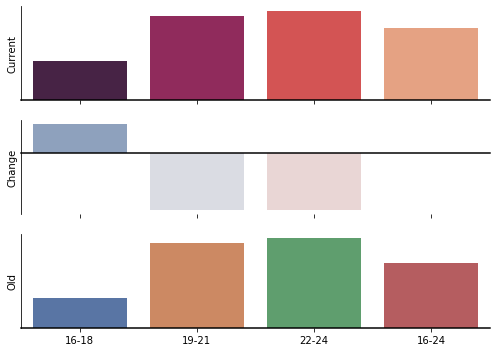

In [523]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)
sns.barplot(x=age_grps, y=oy_array, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Current")

y2 = oy_array - oy_array_old
sns.barplot(x=age_grps, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Change")

sns.barplot(x=age_grps, y=oy_array_old, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Old")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

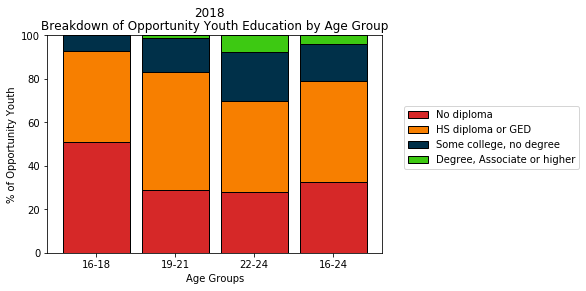

In [524]:
# Data
r = [0,1,2,3]
leg_labels = ['No diploma','HS diploma or GED', 'Some college, no degree', 'Degree, Associate or higher']
raw_data = {'greenBars': oynd_percent, 'orangeBars': oydGED_percent,'blueBars': oyscnd_percent, 'redBars':oydeg_percent}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
 
# plot
barWidth = 0.85
names = list(age_grps)
# Create green Bars
plt.bar(r, greenBars, color='#D62828', edgecolor='black', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#F77F00', edgecolor='black', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#003049', edgecolor='black', width=barWidth)
# Create red Bars
plt.bar(r, redBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#3dc912', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Age Groups")
plt.ylabel("% of Opportunity Youth")
plt.legend(leg_labels, bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc=2)
plt.title('Breakdown of Opportunity Youth Education by Age Group')
plt.suptitle('2018')

# Show graphic
plt.show()

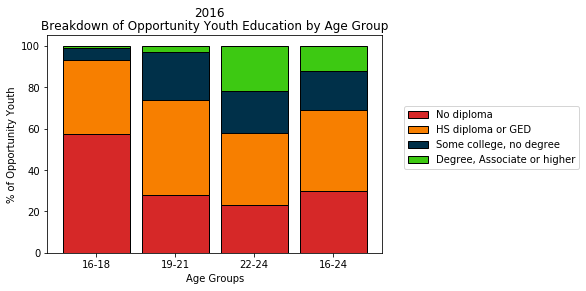

In [525]:
# Data
r = [0,1,2,3]
leg_labels = ['No diploma','HS diploma or GED', 'Some college, no degree', 'Degree, Associate or higher']
raw_data = {'greenBars': [57,28,23,30], 'orangeBars': [35,46,35,39],'blueBars': [6,23,20,19], 'redBars':[1,3,22,12]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
 
# plot
barWidth = 0.85
names = list(age_grps)
# Create green Bars
plt.bar(r, greenBars, color='#D62828', edgecolor='black', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#F77F00', edgecolor='black', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#003049', edgecolor='black', width=barWidth)
# Create red Bars
plt.bar(r, redBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#3dc912', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Age Groups")
plt.ylabel("% of Opportunity Youth")
plt.legend(leg_labels, bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc=2)
plt.title('Breakdown of Opportunity Youth Education by Age Group')
plt.suptitle('2016')

# Show graphic
plt.show()

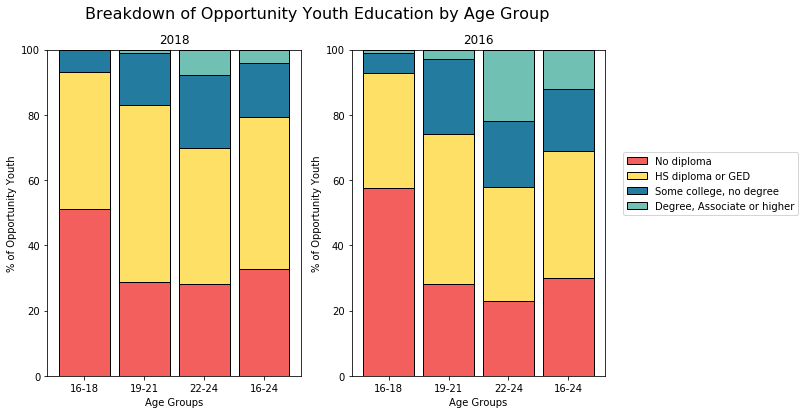

In [561]:
new_figure = plt.figure(figsize=(10,6))
ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
new_figure.suptitle('Breakdown of Opportunity Youth Education by Age Group', fontsize=16)

# Data
r = [0,1,2,3]
leg_labels = ['No diploma','HS diploma or GED', 'Some college, no degree', 'Degree, Associate or higher']
raw_data = {'greenBars': oynd_percent, 'orangeBars': oydGED_percent,'blueBars': oyscnd_percent, 'redBars':oydeg_percent}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
 
# plot
barWidth = 0.85
names = list(age_grps)
# Create green Bars
ax.bar(r, greenBars, color='#F25F5C', edgecolor='black', width=barWidth)
# Create orange Bars
ax.bar(r, orangeBars, bottom=greenBars, color='#FFE066', edgecolor='black', width=barWidth)
# Create blue Bars
ax.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#247BA0', edgecolor='black', width=barWidth)
# Create red Bars
ax.bar(r, redBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#70C1B3', edgecolor='black', width=barWidth)

# Custom x axis
ax.set_xticks(r)
ax.set_xticklabels(names)
ax.set_xlabel("Age Groups")
ax.set_ylabel("% of Opportunity Youth")
ax.set_title('2018')
# ax.set_suptitle('2018')

# Data 2
raw_data2 = {'greenBars': [57,28,23,30], 'orangeBars': [35,46,35,39],'blueBars': [6,23,20,19], 'redBars':[1,3,22,12]}
df2 = pd.DataFrame(raw_data2)
 
# From raw value to percentage
totals2 = [i+j+k+l for i,j,k,l in zip(df2['greenBars'], df2['orangeBars'], df2['blueBars'], df2['redBars'])]
greenBars2 = [i / j * 100 for i,j in zip(df2['greenBars'], totals2)]
orangeBars2 = [i / j * 100 for i,j in zip(df2['orangeBars'], totals2)]
blueBars2 = [i / j * 100 for i,j in zip(df2['blueBars'], totals2)]
redBars2 = [i / j * 100 for i,j in zip(df2['redBars'], totals2)]
 
# plot
barWidth = 0.85
names = list(age_grps)
# Create green Bars
ax2.bar(r, greenBars2, color='#F25F5C', edgecolor='black', width=barWidth)
# Create orange Bars
ax2.bar(r, orangeBars2, bottom=greenBars2, color='#FFE066', edgecolor='black', width=barWidth)
# Create blue Bars
ax2.bar(r, blueBars2, bottom=[i+j for i,j in zip(greenBars2, orangeBars2)], color='#247BA0', edgecolor='black', width=barWidth)
# Create red Bars
ax2.bar(r, redBars2, bottom=[i+j+k for i,j,k in zip(greenBars2, orangeBars2, blueBars2)], color='#70C1B3', edgecolor='black', width=barWidth)

# Custom x axis
ax2.set_xticks(r)
ax2.set_xticklabels(names)
ax2.set_xlabel("Age Groups")
ax2.set_ylabel("% of Opportunity Youth")
ax2.set_ylim(0,100)
ax2.legend(leg_labels, bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc=2)
ax2.set_title('2016')
# ax.set_suptitle('2018')

# Show graphic
plt.show()

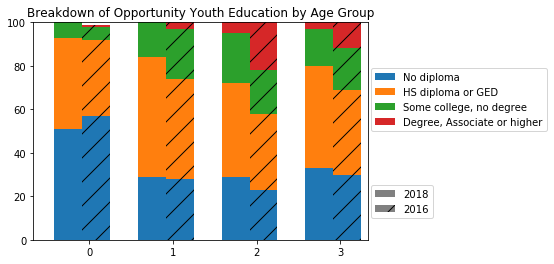

In [556]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="Breakdown of Opportunity Youth Education by Age Group",  H="/", **kwargs):

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False, edgecolor='black',
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    axe.set_ylim(0,100)
    return axe

# create dataframes
raw_data = {'No diploma': oynd_percent, 'HS diploma or GED': oydGED_percent,'Some college, no degree': oyscnd_percent, 'Degree, Associate or higher':oydeg_percent}
df1 = pd.DataFrame(raw_data)
raw_data2 = {'No diploma': [57,28,23,30], 'HS diploma or GED': [35,46,35,39],'Some college, no degree': [6,23,20,19], 'Degree, Associate or higher':[1,3,22,12]}
df2 = pd.DataFrame(raw_data2) 

# Then call :
plot_clustered_stacked([df1, df2],["2018", "2016"])

In [478]:
conn.close()